In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tf=pd.read_excel("C:/Users/ideap/OneDrive/Desktop/EDA/Quantium virtual program/QVI_transaction_data.xlsx")
tf

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# There are 8 Features and 264836 Transaction

In [3]:
tf.shape

(264836, 8)

In [4]:
tf.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


# The datatype of DATE Column is Object Need tochange it into 'Date' Format

In [6]:
tf['DATE']=pd.to_datetime(tf['DATE'],format='%Y-%m-%d')
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
tf.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
tf['DATE'].max()

Timestamp('2019-06-30 00:00:00')

In [9]:
tf['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [10]:
tf.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [11]:
len(tf['PROD_NAME'].unique())

114

There 114 Unique product 

In [12]:
tf['PROD_NAME'].unique()[:20]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g'],
      dtype=object)

There are some Salsa Product indata we are om;y concerned with the chips data we will remove it 

In [13]:
tf=tf[~tf['PROD_NAME'].str.contains('Salsa')]
tf.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
tf.shape

(246742, 8)

In [15]:
len(tf['PROD_NAME'].unique())

105

There are 105 varieties of chips of different brands and flavours

In [16]:
tf['Brand']=tf['PROD_NAME'].str.split(' ').str[0]
tf['Pack size(gm)']=tf['PROD_NAME'].str.extract('(\d+)',expand=False)

C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\2155385214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['Brand']=tf['PROD_NAME'].str.split(' ').str[0]
C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\2155385214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['Pack size(gm)']=tf['PROD_NAME'].str.extract('(\d+)',expand=False)


In [17]:
tf.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [18]:
tf['Pack size(gm)'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

In [19]:
tf['Pack size(gm)']=tf['Pack size(gm)'].astype(int)

C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\3072443431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['Pack size(gm)']=tf['Pack size(gm)'].astype(int)


In [20]:
print("Maximum pack size : ",tf['Pack size(gm)'].max())
print("Minimum pack size : ",tf['Pack size(gm)'].min())

Maximum pack size :  380
Minimum pack size :  70


In [21]:
tf['Brand'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some brand names are incorrect 

In [22]:
tf[tf['Brand']== 'Burger'].head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
16,2018-08-18,20,20418,17413,94,Burger Rings 220g,4,9.2,Burger,220
187,2018-08-19,256,256041,255158,94,Burger Rings 220g,2,4.6,Burger,220
303,2018-09-20,5,5028,4536,94,Burger Rings 220g,2,4.6,Burger,220
537,2018-11-22,22,22375,18593,94,Burger Rings 220g,2,4.6,Burger,220


In [23]:
tf[tf['Brand']== 'French'].head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
86,2019-05-19,115,115381,118981,29,French Fries Potato Chips 175g,1,3.0,French,175
680,2018-09-20,33,33019,29543,29,French Fries Potato Chips 175g,2,6.0,French,175
780,2018-08-25,39,39134,35434,29,French Fries Potato Chips 175g,2,6.0,French,175
1299,2018-12-16,69,69113,66543,29,French Fries Potato Chips 175g,2,6.0,French,175


In [24]:
tf[tf['Brand']== 'Red'].head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
28,2018-08-15,41,41486,38472,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,Red,150
34,2018-08-16,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red,150
212,2019-03-13,1,1348,391,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red,150
297,2018-07-07,5,5026,4524,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,Red,150


In [25]:
tf[tf['Brand']== 'Grain'].head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain,210
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Grain,210
85,2019-05-18,114,114185,118043,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain,210
181,2019-05-20,247,247223,250007,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain,210


In [26]:
tf[tf['Brand']== 'Doritos'].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos,150
18,2018-08-17,22,22456,18696,93,Doritos Corn Chip Southern Chicken 150g,1,3.9,Doritos,150
37,2018-08-17,54,54226,48173,51,Doritos Mexicana 170g,1,4.4,Doritos,170
57,2019-05-14,75,75091,73751,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150
68,2019-05-17,84,84096,83673,47,Doritos Corn Chips Original 170g,1,4.4,Doritos,170
78,2018-08-14,106,106050,107052,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos,150
88,2018-08-20,118,118007,120727,30,Doritos Corn Chips Cheese Supreme 170g,1,4.4,Doritos,170
93,2018-08-18,122,122113,125310,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos,150
96,2018-08-14,128,128148,131503,51,Doritos Mexicana 170g,1,4.4,Doritos,170
102,2019-05-15,133,133250,137666,30,Doritos Corn Chips Cheese Supreme 170g,4,17.6,Doritos,170


Somee of the brand names look like they are same Red and RRD ,'Snbts'and 'Sunbites',
'Doritos' and 'Dorito' ,'Grain' and 'GrnWves' ,'Infzns' and 'Infuzions' ,'Smith' and smiths ,
'Woolworths and WW ,'Natural' AND ncc


Some brands where only first word has been extracted instead of the complete brand name
French and FrenchFries ,Grain and Grain Waves ,Red and Red Rock Deli

In [27]:
tf['Brand'].replace('French','French Fries',inplace =True)
tf['Brand'].replace('Dorito','Doritos',inplace =True)
tf['Brand'].replace('Red','RRD',inplace =True)
tf['Brand'].replace('snbts','Sunbites',inplace =True)
tf['Brand'].replace(['Grain','GrnWves'],'Grain Waves',inplace =True)
tf['Brand'].replace('Natural','NCC',inplace =True)
tf['Brand'].replace('WW','Woolworths',inplace =True)
tf['Brand'].replace(['Burger','Smith'],'Smiths',inplace =True)

C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\2549661946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['Brand'].replace('French','French Fries',inplace =True)
C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\2549661946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['Brand'].replace('Dorito','Doritos',inplace =True)
C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\2549661946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [28]:
tf['Brand'].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Cheezels', 'Infzns', 'RRD',
       'Pringles', 'Infuzions', 'Tyrrells', 'Cobs', 'French Fries',
       'Tostitos', 'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [29]:
tf.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Brand', 'Pack size(gm)'],
      dtype='object')

In [30]:
tf[['PROD_QTY','TOT_SALES','Pack size(gm)']].describe()

,PROD_QTY,TOT_SALES,Pack size(gm)
count,246742.000000,246742.000000,246742.000000
mean,1.908062,7.321322,175.585178
std,0.659831,3.077828,59.434727
min,1.000000,1.700000,70.000000
25%,2.000000,5.800000,150.000000
50%,2.000000,7.400000,170.000000
75%,2.000000,8.800000,175.000000
max,200.000000,650.000000,380.000000


Product quantity have a outlier we have to investigate

C:\Users\ideap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

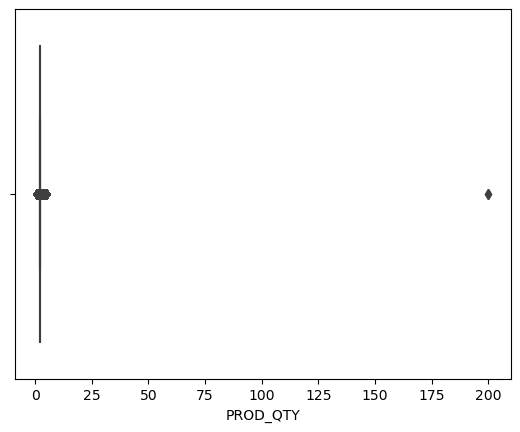

In [31]:
 # checking for outlier
    
sns.boxplot(tf['PROD_QTY'])

In [32]:
tf[tf['PROD_QTY']== 200 ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380


* These Transaction are made by same customer . this customer has made only 2 transaction for whole duration
* It seems this customer is not regular customer

In [33]:
tf1=tf[tf['LYLTY_CARD_NBR'] !=226000]


C:\Users\ideap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

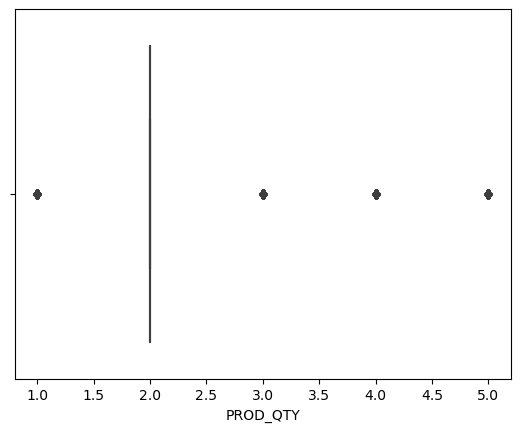

In [34]:
sns.boxplot(tf1['PROD_QTY'])

In [35]:
len(tf['DATE'].unique())

364

In [36]:
# setting date value as index
df=tf.set_index('DATE')

In [37]:
# check missing data from dataset
print(pd.date_range(start='2018-07-01' ,end='2019-06-30').difference(df.index))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


No transaction took place on 2018-12-25 (25 Dec 2018)

In [38]:
#Extracting the dataset for DEC 2018

dec=tf[tf['DATE'].dt.month== 12]
dec.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm)
224,2018-12-14,2,2256,866,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,Snbts,90
232,2018-12-17,2,2454,1071,34,Pringles Slt Vingar 134g,1,3.7,Pringles,134
265,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0,Doritos,380
284,2018-12-02,4,4371,4315,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,Kettle,150
285,2018-12-24,4,4371,4316,78,Thins Chips Salt & Vinegar 175g,2,6.6,Thins,175


In [39]:
# Month wise Sales 

month_wise= pd.DataFrame(tf.groupby(tf['DATE'].dt.month).sum()['TOT_SALES'])
month_wise

,TOT_SALES
DATE,
1,151593.80
2,140480.00
3,155772.80
4,149374.20
5,146950.35
6,150135.90
7,154514.50
8,148072.05
9,150058.90


In [40]:
# Aggregating total sales of december month 

decem= pd.DataFrame(dec.groupby(dec['DATE'].dt.date).sum()['TOT_SALES']).reset_index()
decem

,DATE,TOT_SALES
0,2018-12-01,5000.9
1,2018-12-02,4781.1
2,2018-12-03,4927.0
3,2018-12-04,4869.4
4,2018-12-05,4900.5
5,2018-12-06,4792.9
6,2018-12-07,4971.7
7,2018-12-08,4618.4
8,2018-12-09,4844.8
9,2018-12-10,5037.7


In [41]:
#Changing datatype Object to Datetime

decem['DATE']=decem['DATE'].astype('datetime64')

In [42]:
#creating sequence of dates

dates=pd.DataFrame(pd.date_range(start='2018-12-01',end='2018-12-31'),columns=['DATE'])
dates

,DATE
0,2018-12-01
1,2018-12-02
2,2018-12-03
3,2018-12-04
4,2018-12-05
5,2018-12-06
6,2018-12-07
7,2018-12-08
8,2018-12-09
9,2018-12-10


In [43]:
# Combining tables
Dec_table= pd.merge(left=dates,right=decem,how='left',on='DATE')
Dec_table

,DATE,TOT_SALES
0,2018-12-01,5000.9
1,2018-12-02,4781.1
2,2018-12-03,4927.0
3,2018-12-04,4869.4
4,2018-12-05,4900.5
5,2018-12-06,4792.9
6,2018-12-07,4971.7
7,2018-12-08,4618.4
8,2018-12-09,4844.8
9,2018-12-10,5037.7


In [44]:
#converting datetime to date
Dec_table['DATE']=pd.to_datetime(Dec_table['DATE']).dt.date

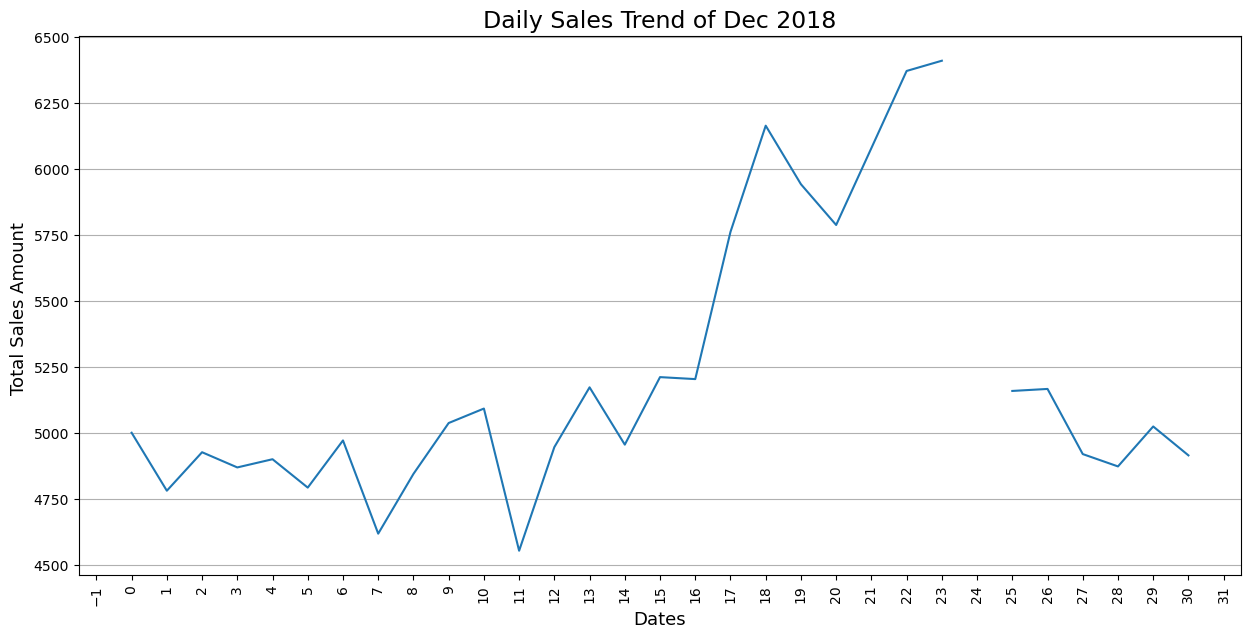

In [45]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(15,7))
plt.plot(Dec_table.index,Dec_table['TOT_SALES'])
plt.title("Daily Sales Trend of Dec 2018",fontsize=17)
plt.xlabel('Dates',fontsize=13)
plt.ylabel('Total Sales Amount ',fontsize=13)

plt.xticks(rotation=90)

plt.grid(axis='y')

ax=plt.gca()
days=mdates.DayLocator()
ax.xaxis.set_major_locator(days)

plt.show()

 * We can see Increase in Purchase in December and Break in Late December
 * We can see increase in sales on Christmas day

In [46]:
pf=pd.read_csv("C:/Users/ideap/OneDrive/Desktop/EDA/Quantium virtual program/QVI_purchase_behaviour.csv")
pf

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [47]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [48]:
pf['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [49]:
pf['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

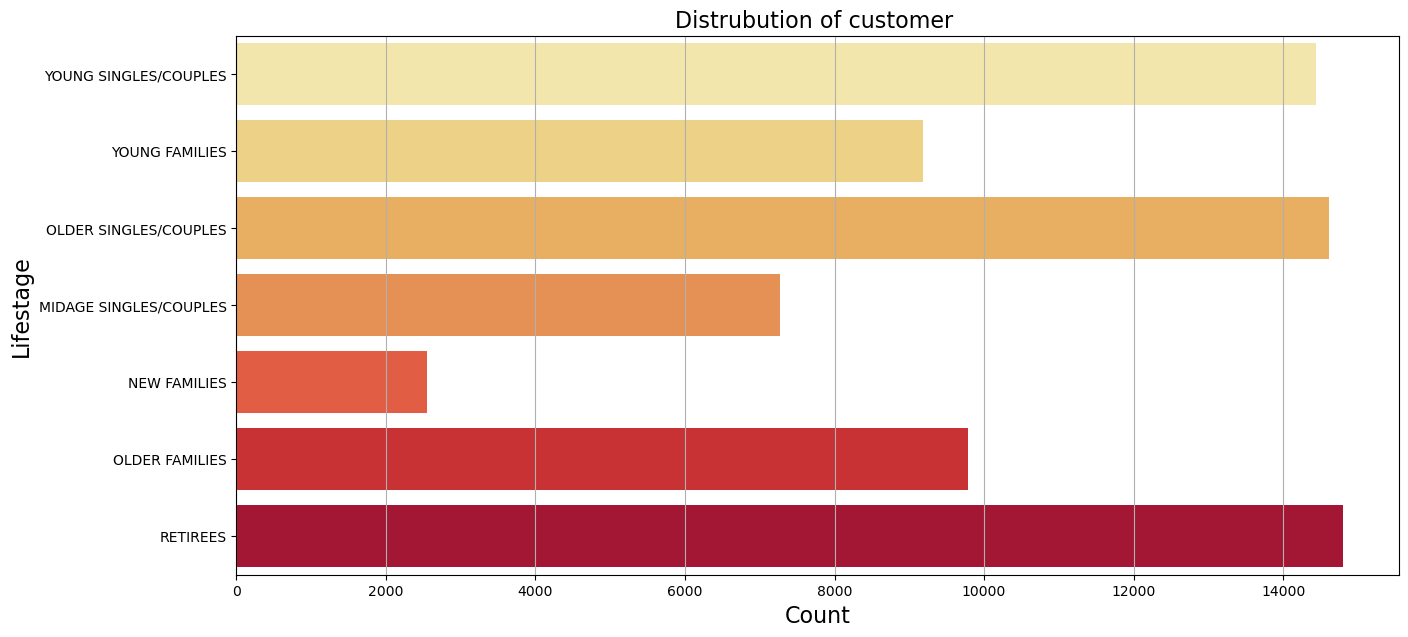

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(y='LIFESTAGE',data=pf ,palette ='YlOrRd')
plt.title("Distrubution of customer ",fontsize=16)
plt.ylabel('Lifestage',fontsize=16)
plt.xlabel('Count',fontsize=16)
plt.grid(axis='x')
plt.show()

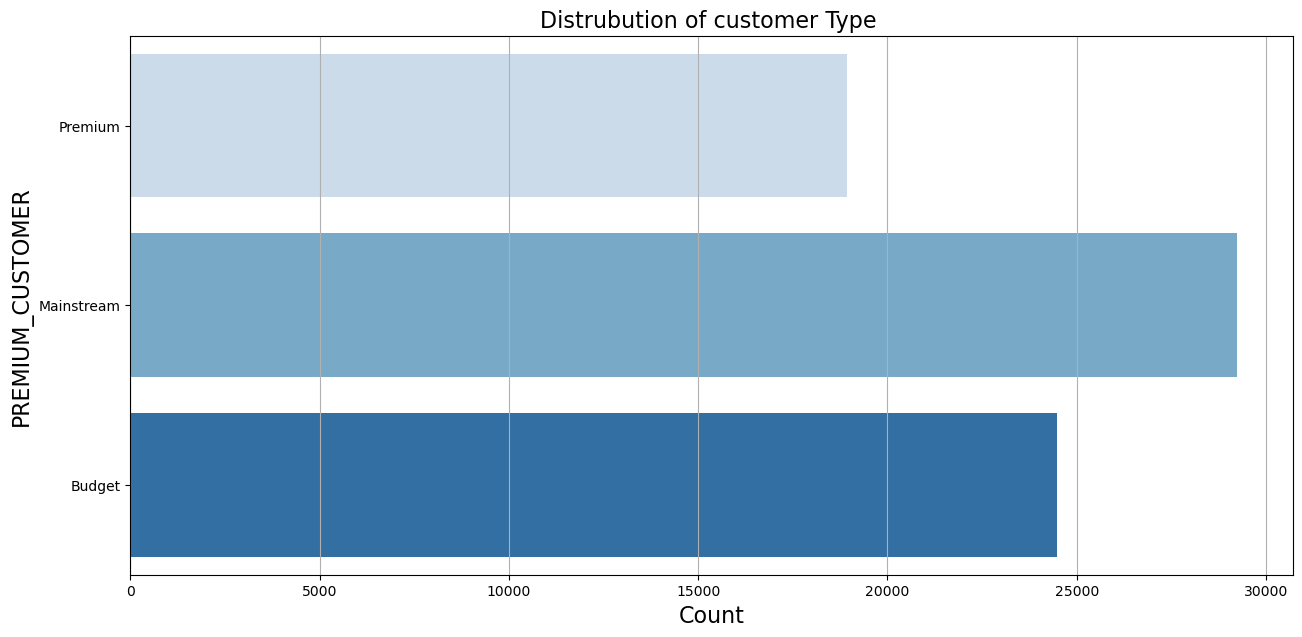

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(y='PREMIUM_CUSTOMER',data=pf ,palette ='Blues')
plt.title("Distrubution of customer Type ",fontsize=16)
plt.ylabel('PREMIUM_CUSTOMER',fontsize=16)
plt.xlabel('Count',fontsize=16)
plt.grid(axis='x')
plt.show()

In [52]:
cb=pd.merge(left=tf,right=pf,how='left',on='LYLTY_CARD_NBR')
cb.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


In [53]:
cb.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Brand               0
Pack size(gm)       0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [54]:
cb.to_csv('merge_quantium_dataset.csv')

## Top 10 Products by Total Sales Amount

In [55]:
prduct=pd.DataFrame(tf.groupby('PROD_NAME').sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:10]

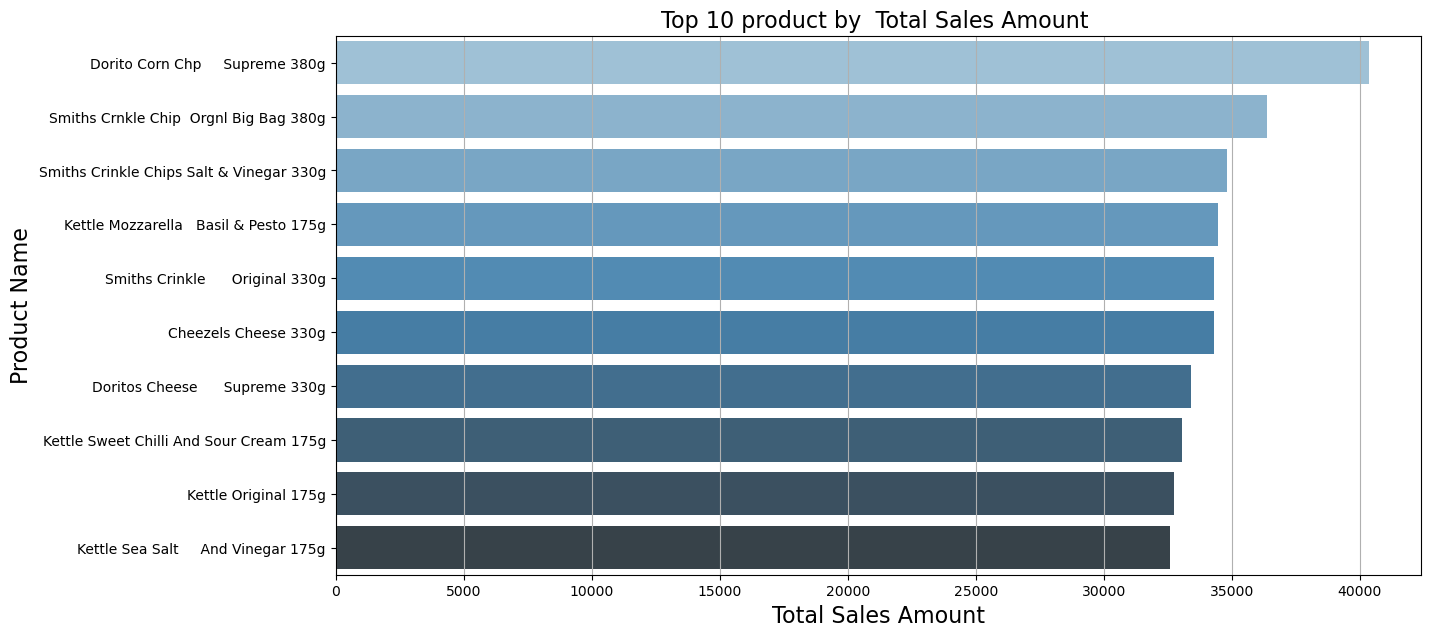

In [56]:
plt.figure(figsize=(14,7))
sns.barplot(x=prduct['TOT_SALES'].values,y=prduct.index ,palette ='Blues_d',orient='h')
plt.title("Top 10 product by  Total Sales Amount ",fontsize=16)
plt.ylabel('Product Name',fontsize=16)
plt.xlabel('Total Sales Amount',fontsize=16)
plt.grid(axis='x')
plt.show()

 ## Top 10 customer by Sales Amount

In [57]:
tf['LYLTY_CARD_NBR ']=tf['LYLTY_CARD_NBR'].astype(str)

C:\Users\ideap\AppData\Local\Temp\ipykernel_16852\3146583863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['LYLTY_CARD_NBR ']=tf['LYLTY_CARD_NBR'].astype(str)


In [58]:
cust=pd.DataFrame(tf1.groupby('LYLTY_CARD_NBR').sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:10]

In [59]:
cust

,TOT_SALES
LYLTY_CARD_NBR,
230078,138.6
58361,124.8
63197,122.6
162039,121.6
179228,120.8
199157,118.8
3153,116.4
95048,115.1
5168,114.8


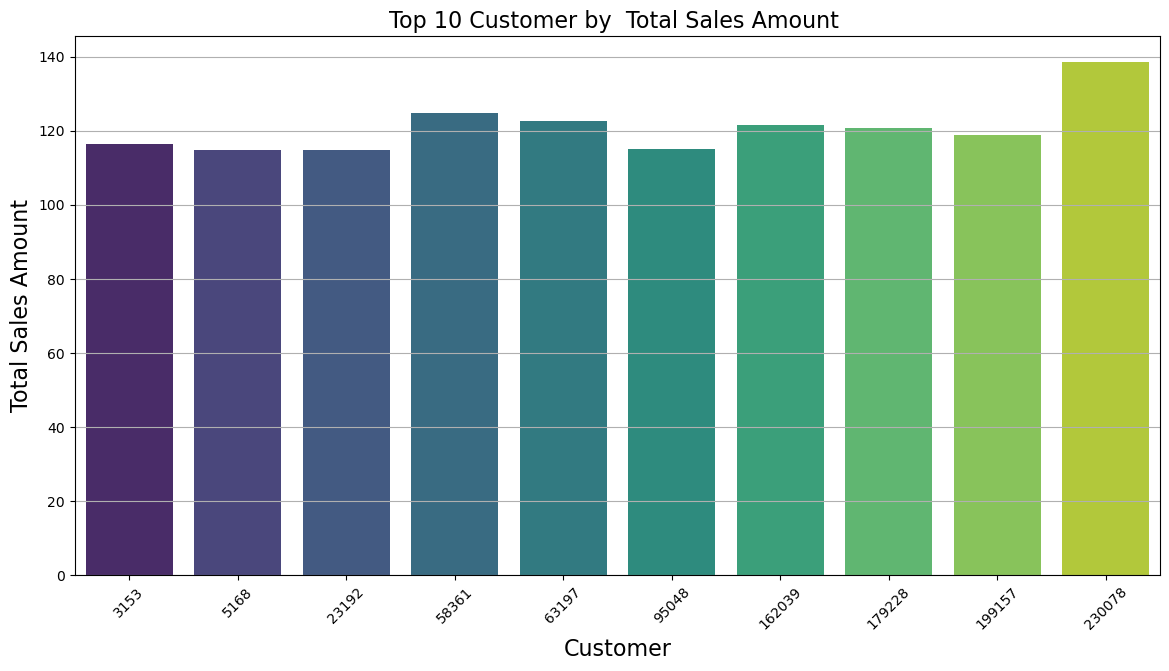

In [60]:
plt.figure(figsize=(14,7))
sns.barplot(x=cust.index,y=cust['TOT_SALES'] ,palette ='viridis')
plt.title("Top 10 Customer by  Total Sales Amount ",fontsize=16)
plt.xlabel('Customer',fontsize=16)
plt.ylabel('Total Sales Amount',fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

 ## Top 10 brand by Sales Amount

In [61]:
brand=pd.DataFrame(tf1.groupby('Brand').sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:10]

In [62]:
brand

,TOT_SALES
Brand,
Kettle,390239.8
Doritos,226329.9
Smiths,224323.0
Pringles,177655.5
Thins,88852.5
RRD,87607.5
Twisties,81522.1
Tostitos,79789.6
Infuzions,76247.6


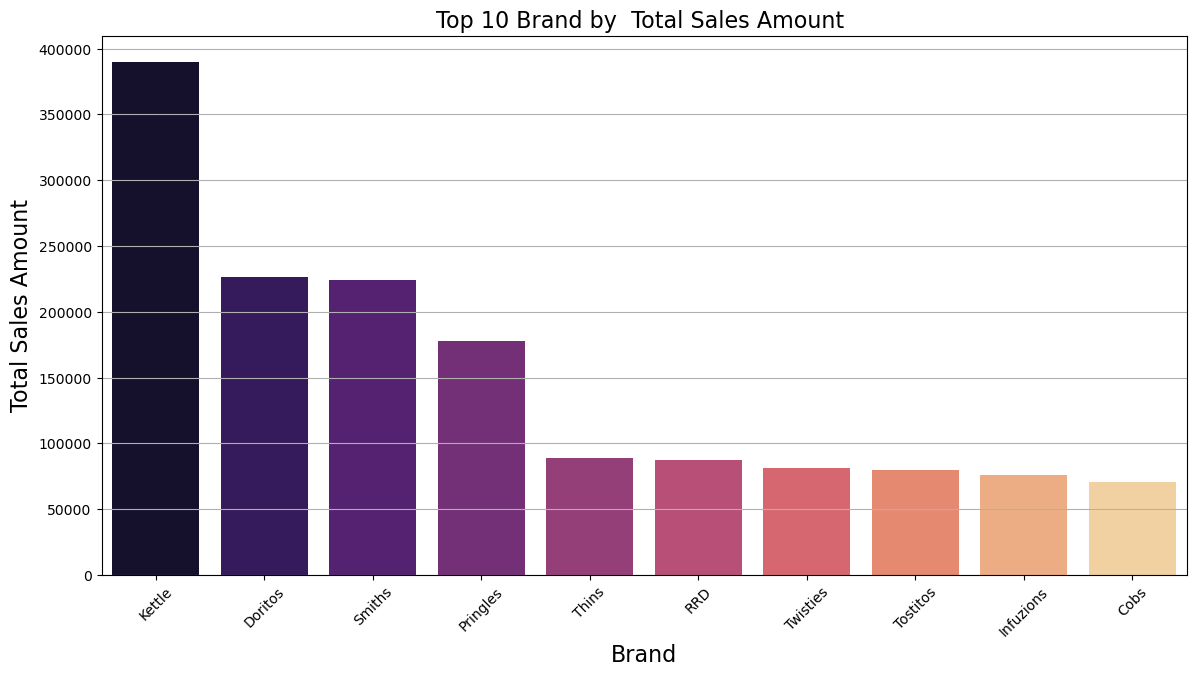

In [63]:
plt.figure(figsize=(14,7))
sns.barplot(x=brand.index,y=brand['TOT_SALES'] ,palette ='magma')
plt.title("Top 10 Brand by  Total Sales Amount ",fontsize=16)
plt.xlabel('Brand',fontsize=16)
plt.ylabel('Total Sales Amount',fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [64]:
pack_size =pd.DataFrame(tf1.groupby('Pack size(gm)').sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:10]

In [65]:
pack_size

,TOT_SALES
Pack size(gm),
175,485437.4
150,289681.8
134,177655.5
110,162765.4
170,146673.0
330,136794.3
165,101360.6
380,75419.6
270,55425.4


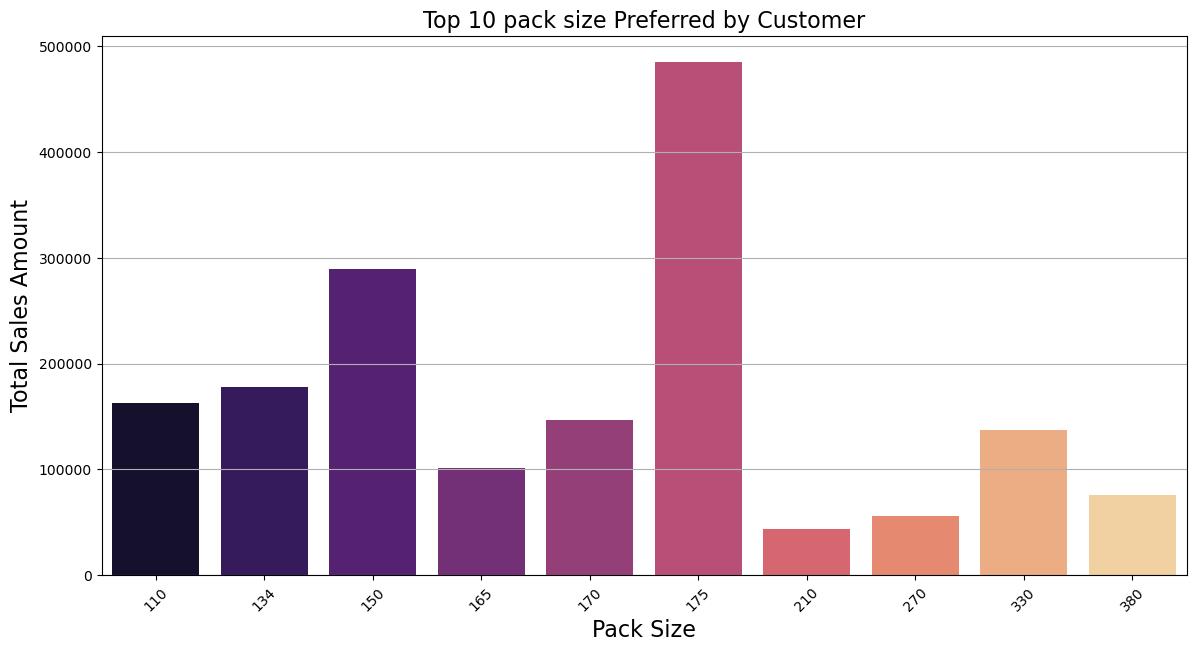

In [66]:
plt.figure(figsize=(14,7))
sns.barplot(x=pack_size.index,y=pack_size['TOT_SALES'].values,data=pack_size ,palette ='magma')
plt.title("Top 10 pack size Preferred by Customer",fontsize=16)
plt.xlabel('Pack Size',fontsize=16)
plt.ylabel('Total Sales Amount',fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Spend Most On Chips(Total Sales) by Customer Segment

In [67]:
age_cust =pd.DataFrame(cb.groupby('LIFESTAGE').sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:10]

In [68]:
age_cust

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,376019.65
RETIREES,342381.90
OLDER FAMILIES,329819.90
YOUNG FAMILIES,294627.90
YOUNG SINGLES/COUPLES,243756.60
MIDAGE SINGLES/COUPLES,172523.80
NEW FAMILIES,47347.95


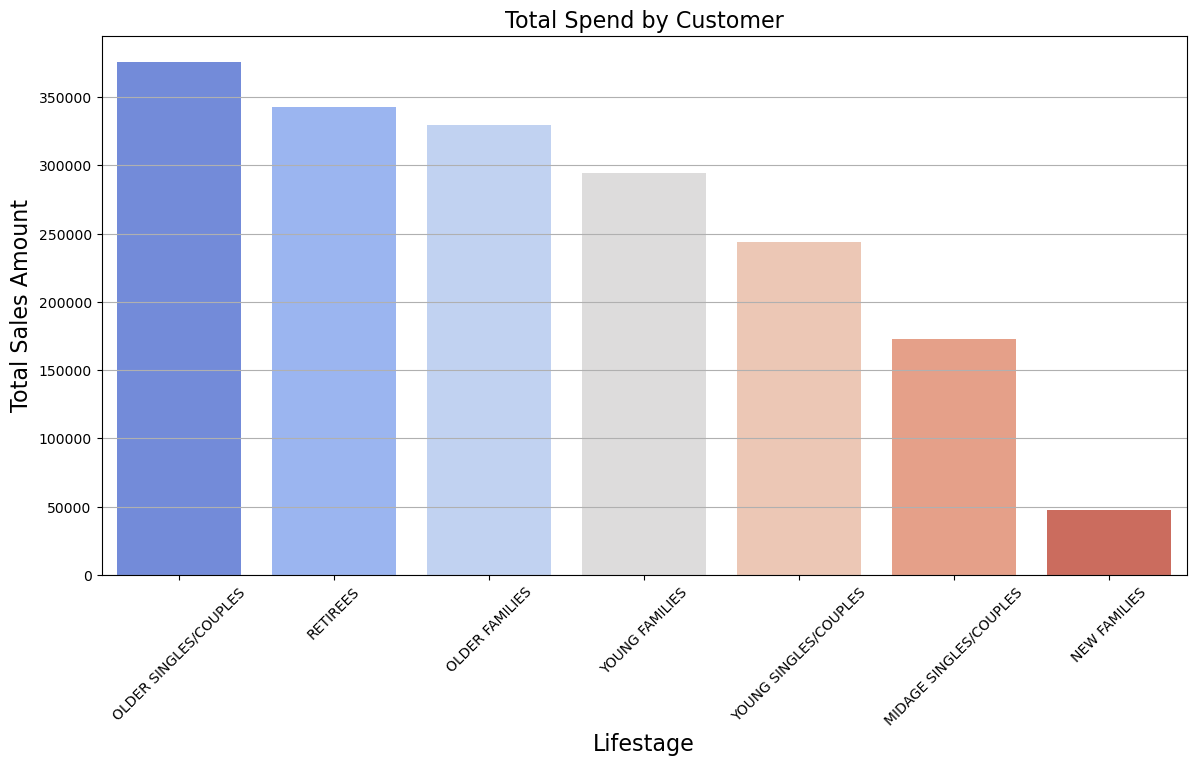

In [69]:
plt.figure(figsize=(14,7))
sns.barplot(x=age_cust.index,y=age_cust['TOT_SALES'].values,data=pack_size ,palette ='coolwarm')
plt.title("Total Spend by Customer",fontsize=16)
plt.xlabel('Lifestage',fontsize=16)
plt.ylabel('Total Sales Amount',fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Who Spend Most On Customer Category 

In [70]:
cust_cate=pd.DataFrame(cb.groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:10]

In [71]:
cust_cate

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,700865.40
Budget,631406.85
Premium,474205.45


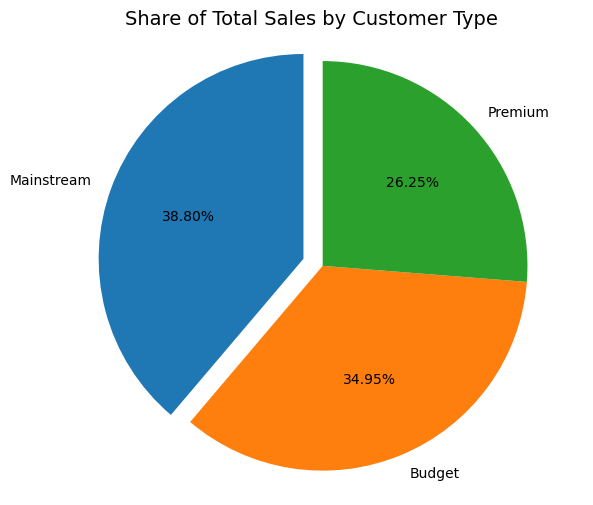

In [72]:
plt.figure(figsize=(7,6))
explode=(0.1,0,0)
plt.pie(cust_cate.values.flatten(),labels=cust_cate.index,explode=explode,startangle=90,autopct='%1.2f%%')
plt.title('Share of Total Sales by Customer Type',fontsize=14)
plt.axis('equal')
plt.show()


## Which Customer segment is contributing more to the Total sales (by Lifestage & Customer category)

In [73]:
cust_seg=pd.DataFrame(cb.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()['TOT_SALES']).sort_values('TOT_SALES',ascending=False)[:5]

In [74]:
cust_seg

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                       
Budget           OLDER FAMILIES         156863.75
Mainstream       YOUNG SINGLES/COUPLES  147582.20
                 RETIREES               145168.95
Budget           YOUNG FAMILIES         129717.95
                 OLDER SINGLES/COUPLES  127833.60

In [75]:
df11 = pd.pivot_table(cb, index='LIFESTAGE', columns='PREMIUM_CUSTOMER',
values='TOT_SALES', aggfunc='sum')
df11


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,76542.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


In [76]:
df11.values

array([[ 33345.7 ,  84734.25,  54443.85],
       [ 20607.45,  15979.7 ,  10760.8 ],
       [156863.75,  96413.55,  76542.6 ],
       [127833.6 , 124648.5 , 123537.55],
       [105916.3 , 145168.95,  91296.65],
       [129717.95,  86338.25,  78571.7 ],
       [ 57122.1 , 147582.2 ,  39052.3 ]])

In [77]:
df11.index

Index(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'],
      dtype='object', name='LIFESTAGE')

In [78]:
df11.values.sum()

1806477.7

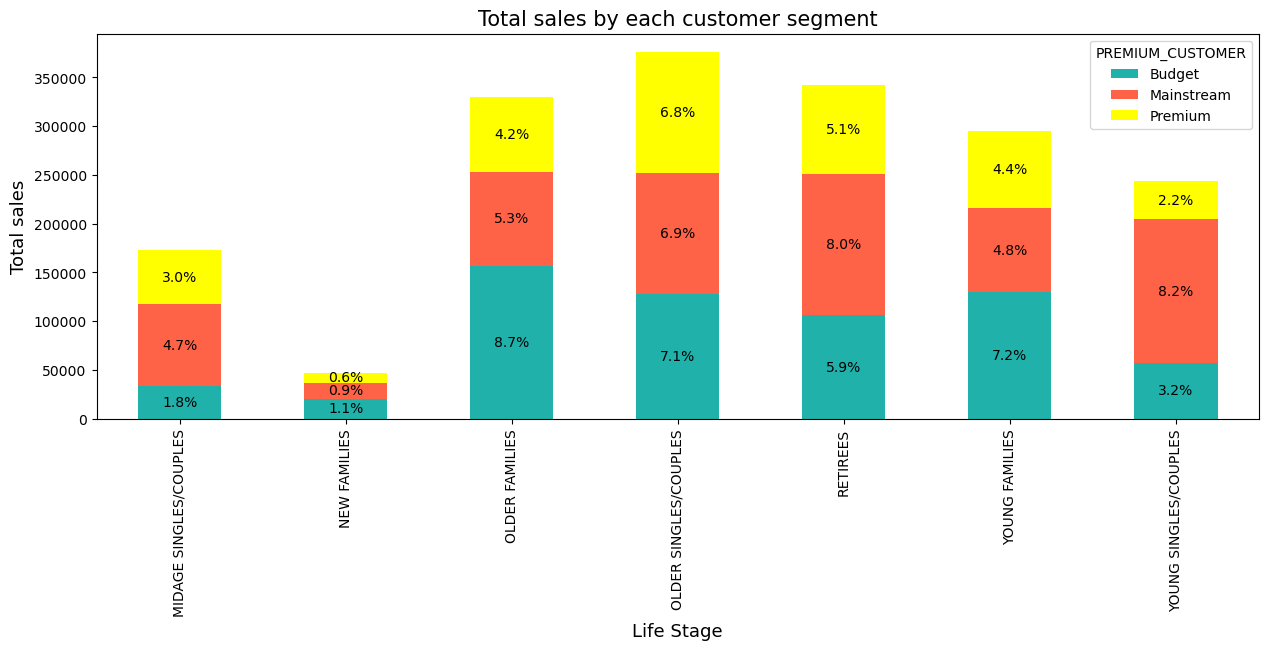

In [79]:
ax = df11.plot.bar(stacked=True, color =['lightseagreen', 'tomato', 'yellow'], figsize=(15,5))
ax.set_title('Total sales by each customer segment', fontsize=15)

ax.set_xticklabels(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'])


plt.ylabel('Total sales', fontsize=13)
plt.xlabel('Life Stage', fontsize=13)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{((height/1805177.7)*100):.1f}%'
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
plt.show()


## Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [80]:
cust_count=pd.DataFrame(cb.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().reset_index(name='cust_count').sort_values('cust_count',ascending=False))[:5]

In [81]:
cust_count

,PREMIUM_CUSTOMER,LIFESTAGE,cust_count
13,Mainstream,YOUNG SINGLES/COUPLES,7917
11,Mainstream,RETIREES,6358
10,Mainstream,OLDER SINGLES/COUPLES,4858
3,Budget,OLDER SINGLES/COUPLES,4849
17,Premium,OLDER SINGLES/COUPLES,4682


In [82]:
df12 = pd.pivot_table(cb, index='LIFESTAGE', columns='PREMIUM_CUSTOMER',
values='LYLTY_CARD_NBR', aggfunc='nunique')
df12


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2232
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


In [83]:
df12.values.sum()

71288

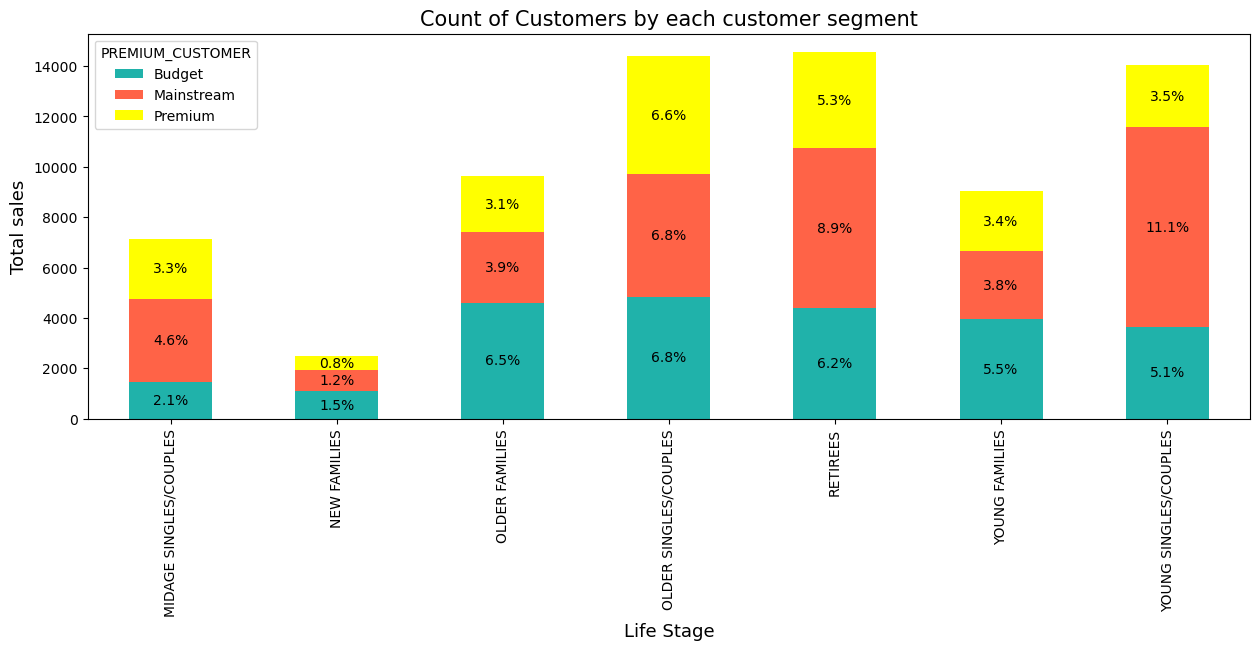

In [84]:
ax = df12.plot.bar(stacked=True, color =['lightseagreen', 'tomato', 'yellow'], figsize=(15,5))
ax.set_title('Count of Customers by each customer segment', fontsize=15)

ax.set_xticklabels(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'])


plt.ylabel('Total sales', fontsize=13)
plt.xlabel('Life Stage', fontsize=13)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{((height/71288)*100):.1f}%'
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to
these customer segments but this is not a major driver for the Budget - Older families segment.

 ## Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [85]:
avg_units=pd.DataFrame(cb.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'PROD_QTY':'sum','LYLTY_CARD_NBR':'nunique'})).reset_index()

In [86]:
avg_units

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,LYLTY_CARD_NBR
0,Budget,MIDAGE SINGLES/COUPLES,8883,1474
1,Budget,NEW FAMILIES,5241,1087
2,Budget,OLDER FAMILIES,41853,4611
3,Budget,OLDER SINGLES/COUPLES,32883,4849
4,Budget,RETIREES,26932,4385
5,Budget,YOUNG FAMILIES,34482,3953
6,Budget,YOUNG SINGLES/COUPLES,15500,3647
7,Mainstream,MIDAGE SINGLES/COUPLES,21213,3298
8,Mainstream,NEW FAMILIES,4060,830
9,Mainstream,OLDER FAMILIES,25804,2788


In [87]:
avg_units['Unit_per_cost']=avg_units['PROD_QTY']/avg_units['LYLTY_CARD_NBR']
avg_units

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,LYLTY_CARD_NBR,Unit_per_cost
0,Budget,MIDAGE SINGLES/COUPLES,8883,1474,6.026459
1,Budget,NEW FAMILIES,5241,1087,4.821527
2,Budget,OLDER FAMILIES,41853,4611,9.076773
3,Budget,OLDER SINGLES/COUPLES,32883,4849,6.781398
4,Budget,RETIREES,26932,4385,6.141847
5,Budget,YOUNG FAMILIES,34482,3953,8.722995
6,Budget,YOUNG SINGLES/COUPLES,15500,3647,4.250069
7,Mainstream,MIDAGE SINGLES/COUPLES,21213,3298,6.432080
8,Mainstream,NEW FAMILIES,4060,830,4.891566
9,Mainstream,OLDER FAMILIES,25804,2788,9.255380


In [88]:
df13 = pd.pivot_table(avg_units, index='LIFESTAGE', columns='PREMIUM_CUSTOMER',
values='Unit_per_cost', aggfunc='mean')
df13


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,6.026459,6.432080,6.078514
NEW FAMILIES,4.821527,4.891566,4.815652
OLDER FAMILIES,9.076773,9.255380,9.246864
OLDER SINGLES/COUPLES,6.781398,6.712021,6.769543
RETIREES,6.141847,5.925920,6.103358
YOUNG FAMILIES,8.722995,8.638361,8.716013
YOUNG SINGLES/COUPLES,4.250069,4.575597,4.264113


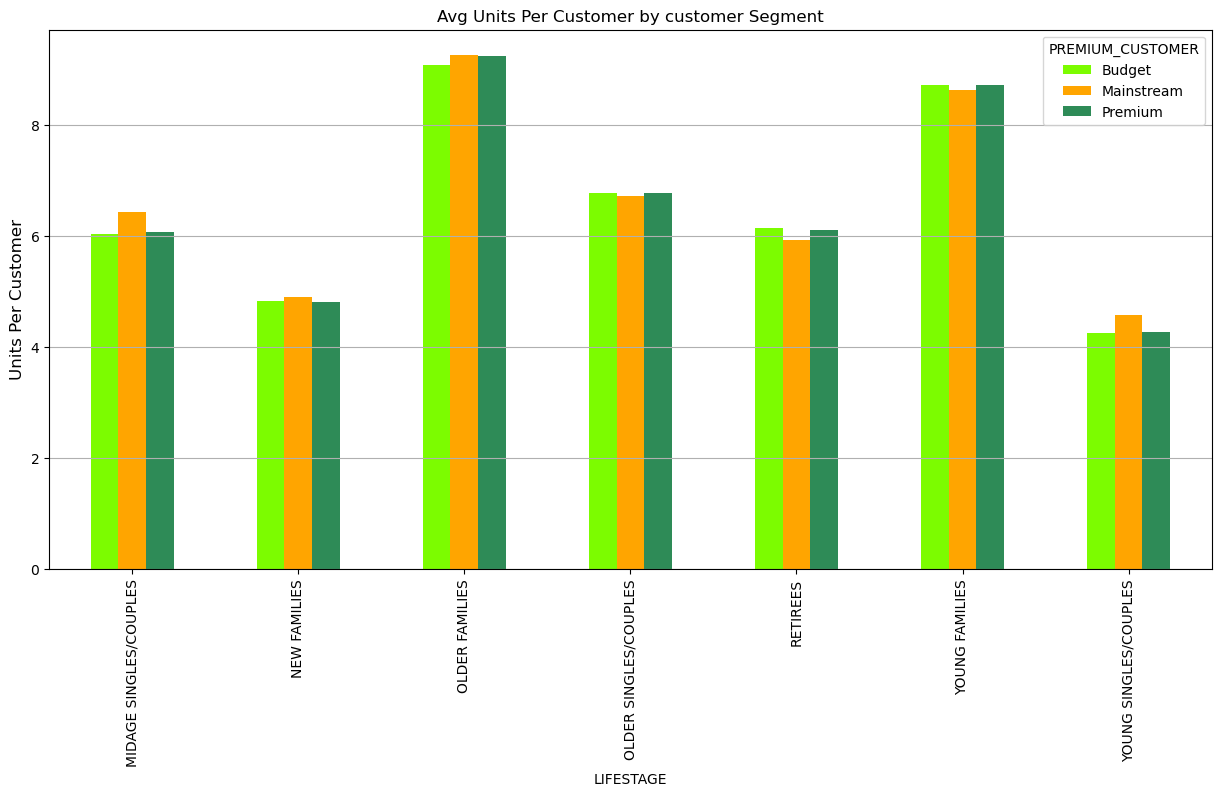

In [89]:
df13.plot.bar(rot=90,color=['lawngreen', 'orange', 'seagreen'],figsize=(15,7))
plt.title('Avg Units Per Customer by customer Segment',fontsize=12)
plt.xlabel=('LifeStage')
plt.ylabel('Units Per Customer',fontsize=12)
plt.grid(axis='y')
plt.show()

Older families and young families in general buy more chips per customer

## Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [90]:
cb['Unit_price']=cb['TOT_SALES']/cb['PROD_QTY']
cb.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack size(gm),LIFESTAGE,PREMIUM_CUSTOMER,Unit_price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,175,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget,4.60


In [91]:
pd.DataFrame(cb.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['Unit_price'].mean()).sort_values(['Unit_price'],ascending=False)


Unit_price
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.065642
                 MIDAGE SINGLES/COUPLES    3.994241
Budget           RETIREES                  3.924404
Premium          RETIREES                  3.920942
Budget           NEW FAMILIES              3.917688
Mainstream       NEW FAMILIES              3.916133
Premium          OLDER SINGLES/COUPLES     3.893182
Budget           OLDER SINGLES/COUPLES     3.882096
Premium          NEW FAMILIES              3.872110
Mainstream       RETIREES                  3.844294
                 OLDER SINGLES/COUPLES     3.814665
Premium          MIDAGE SINGLES/COUPLES    3.770698
                 YOUNG FAMILIES            3.762150
Budget           YOUNG FAMILIES            3.760737
                 OLDER FAMILIES            3.745340
                 MIDAGE SINGLES/COUPLES    3.743328
Mainstream       OLDER FAMILIES            3.737077
                 YOUNG FAMILIES            3.724533
Premium          OLDER FAMILIES            3.716910
                 YOUNG SINGLES/COUPLES     3.665414
Budget           YOUNG SINGLES/COUPLES     3.657366

In [92]:
price_per_product=pd.DataFrame(cb.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'TOT_SALES':'sum','PROD_QTY':'sum'})).reset_index()

In [93]:
price_per_product

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,33345.70,8883
1,Budget,NEW FAMILIES,20607.45,5241
2,Budget,OLDER FAMILIES,156863.75,41853
3,Budget,OLDER SINGLES/COUPLES,127833.60,32883
4,Budget,RETIREES,105916.30,26932
5,Budget,YOUNG FAMILIES,129717.95,34482
6,Budget,YOUNG SINGLES/COUPLES,57122.10,15500
7,Mainstream,MIDAGE SINGLES/COUPLES,84734.25,21213
8,Mainstream,NEW FAMILIES,15979.70,4060
9,Mainstream,OLDER FAMILIES,96413.55,25804


In [94]:
price_per_product['Unit_price']=price_per_product['TOT_SALES']/price_per_product['PROD_QTY']
price_per_product

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,PROD_QTY,Unit_price
0,Budget,MIDAGE SINGLES/COUPLES,33345.70,8883,3.753878
1,Budget,NEW FAMILIES,20607.45,5241,3.931969
2,Budget,OLDER FAMILIES,156863.75,41853,3.747969
3,Budget,OLDER SINGLES/COUPLES,127833.60,32883,3.887529
4,Budget,RETIREES,105916.30,26932,3.932731
5,Budget,YOUNG FAMILIES,129717.95,34482,3.761903
6,Budget,YOUNG SINGLES/COUPLES,57122.10,15500,3.685297
7,Mainstream,MIDAGE SINGLES/COUPLES,84734.25,21213,3.994449
8,Mainstream,NEW FAMILIES,15979.70,4060,3.935887
9,Mainstream,OLDER FAMILIES,96413.55,25804,3.736380


In [95]:
df14= pd.pivot_table(price_per_product, index='LIFESTAGE', columns='PREMIUM_CUSTOMER',
values='Unit_price', aggfunc='mean')
df14


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.753878,3.994449,3.780823
NEW FAMILIES,3.931969,3.935887,3.886168
OLDER FAMILIES,3.747969,3.736380,3.708639
OLDER SINGLES/COUPLES,3.887529,3.822753,3.897698
RETIREES,3.932731,3.852986,3.924037
YOUNG FAMILIES,3.761903,3.722439,3.759232
YOUNG SINGLES/COUPLES,3.685297,4.074043,3.692889


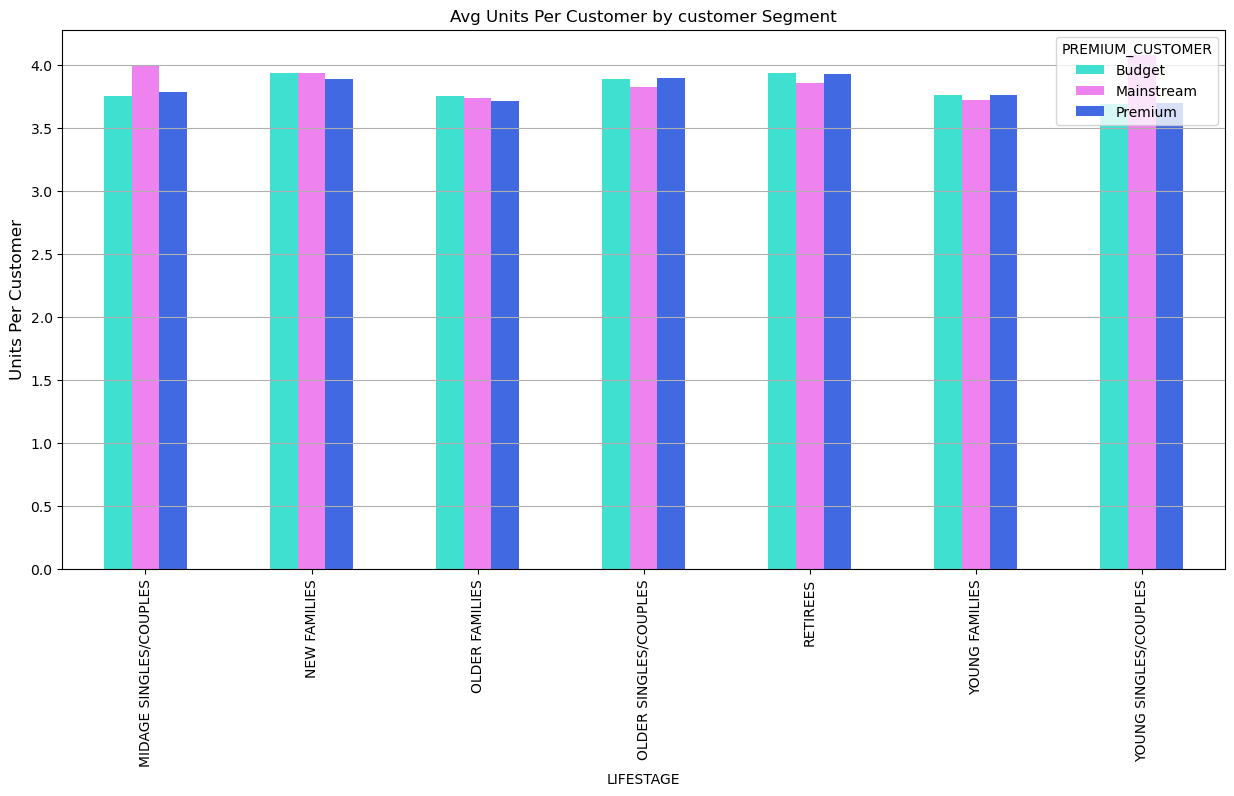

In [96]:
df14.plot.bar(rot=90,color=['turquoise', 'violet', 'royalblue'],figsize=(15,7))
plt.title('Avg Units Per Customer by customer Segment',fontsize=12)
plt.xlabel=('LifeStage')
plt.ylabel('Units Per Customer',fontsize=12)
plt.grid(axis='y')
plt.show()


* Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and
premium counterparts 
* This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips
* his is also supported by there being fewer premium midage and young singles and couples buying chips compared to their
mainstream counterparts

In [97]:
import scipy
from scipy import stats

In [98]:
cb['Unit_price'] = cb['TOT_SALES']/cb['PROD_QTY']

In [99]:
mainstream=cb[(cb['PREMIUM_CUSTOMER']=='Mainstream') & (cb['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]

premium_budget=cb[(cb['PREMIUM_CUSTOMER'] !='Mainstream') & (cb['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]

In [100]:
print(mainstream['Unit_price'].mean()) ;print(premium_budget['Unit_price'].mean())

4.039785893795144
3.70649131996387


In [101]:
stats.ttest_ind(mainstream['Unit_price'],premium_budget['Unit_price'],equal_var=True)

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

Brands that the top customer segment prefer

In [110]:
mainstream_brand = cb[(cb['PREMIUM_CUSTOMER'] == 'Mainstream') &
(cb['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

other = cb[~((cb['PREMIUM_CUSTOMER'] == 'Mainstream') &
(cb['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]

In [111]:
mainstream_brand_qty=mainstream_brand['PROD_QTY'].sum()
other_qty=other['PROD_QTY'].sum()

print('mainstream product qty :' ,mainstream_brand_qty)
print('Other product qty :' ,other_qty)

mainstream product qty : 36225
Other product qty : 434574


In [112]:
m_brand = pd.DataFrame(mainstream_brand.groupby(['Brand']).agg({'PROD_QTY': 'sum'})).reset_index()
m_brand.head()

,Brand,PROD_QTY
0,CCs,405
1,Cheetos,291
2,Cheezels,651
3,Cobs,1617
4,Doritos,4447


In [113]:
m_brand['Target_segment_brand']=m_brand['PROD_QTY']/mainstream_brand_qty
m_brand[['Brand','Target_segment_brand']]

,Brand,Target_segment_brand
0,CCs,0.011180
1,Cheetos,0.008033
2,Cheezels,0.017971
3,Cobs,0.044638
4,Doritos,0.122761
5,French Fries,0.003948
6,Grain Waves,0.032712
7,Infuzions,0.049745
8,Infzns,0.014934
9,Kettle,0.197985


In [114]:
m_otherbrand = pd.DataFrame(other.groupby(['Brand']).agg({'PROD_QTY': 'sum'})).reset_index()
m_otherbrand.head()

,Brand,PROD_QTY
0,CCs,8204
1,Cheetos,5239
2,Cheezels,8096
3,Cobs,16954
4,Doritos,44284


In [120]:
m_otherbrand['Other_segment_brand']=m_otherbrand['PROD_QTY']/other_qty
m_otherbrand[['Brand','Other_segment_brand']]

,Brand,Other_segment_brand
0,CCs,0.018878
1,Cheetos,0.012055
2,Cheezels,0.018630
3,Cobs,0.039013
4,Doritos,0.101902
5,French Fries,0.005753
6,Grain Waves,0.031159
7,Infuzions,0.044450
8,Infzns,0.012562
9,Kettle,0.165401


In [121]:
m_brand_affinity=pd.merge(m_brand,m_otherbrand ,how='inner',on='Brand')
m_brand_affinity.head()

,Brand,PROD_QTY_x,Target_segment_brand,PROD_QTY_y,Other_segment_brand
0,CCs,405,0.011180,8204,0.018878
1,Cheetos,291,0.008033,5239,0.012055
2,Cheezels,651,0.017971,8096,0.018630
3,Cobs,1617,0.044638,16954,0.039013
4,Doritos,4447,0.122761,44284,0.101902


In [125]:
m_brand_affinity['brand_affinity']=m_brand_affinity['Target_segment_brand']/m_brand_affinity['Other_segment_brand']
m_brand_affinity[['Other_segment_brand','Target_segment_brand','Brand','brand_affinity']].sort_values('brand_affinity',ascending=False)

,Other_segment_brand,Target_segment_brand,Brand,brand_affinity
19,0.025669,0.031553,Tyrrells,1.229227
18,0.037842,0.046184,Twisties,1.220443
4,0.101902,0.122761,Doritos,1.204691
9,0.165401,0.197985,Kettle,1.196998
17,0.037943,0.045411,Tostitos,1.196815
8,0.012562,0.014934,Infzns,1.188884
11,0.100542,0.119420,Pringles,1.187764
3,0.039013,0.044638,Cobs,1.144177
7,0.044450,0.049745,Infuzions,1.119104
16,0.056934,0.060373,Thins,1.060399


* Mainstream young singles/couples are 22% more likely to purchase Tyrrells chips compared to the rest
* Mainstream young singles/couples are 53% less likely to purchase Sunbites chips compared to the rest

Pack Sizes that the top customer segment prefer

In [127]:
#Mainstream brand

m_packsize = pd.DataFrame(mainstream_brand.groupby(['Pack size(gm)']).agg({'PROD_QTY': 'sum'})).reset_index()
m_packsize.head()

,Pack size(gm),PROD_QTY
0,70,110
1,90,230
2,110,3850
3,125,109
4,134,4326


In [129]:
m_packsize['Target_segment_packsize']=m_packsize['PROD_QTY']/mainstream_brand_qty
m_packsize[['Pack size(gm)','Target_segment_packsize']]

,Pack size(gm),Target_segment_packsize
0,70,0.003037
1,90,0.006349
2,110,0.106280
3,125,0.003009
4,134,0.119420
5,135,0.014769
6,150,0.157598
7,160,0.006404
8,165,0.055652
9,170,0.080773


In [130]:
#Other brand

m_otherpacksize = pd.DataFrame(other.groupby(['Pack size(gm)']).agg({'PROD_QTY': 'sum'})).reset_index()
m_otherpacksize.head()

,Pack size(gm),PROD_QTY
0,70,2745
1,90,5462
2,110,38985
3,125,2621
4,134,43693


In [131]:
m_otherpacksize['Other_segment_packsize']=m_otherpacksize['PROD_QTY']/other_qty
m_otherpacksize[['Pack size(gm)','Other_segment_packsize']]

,Pack size(gm),Other_segment_packsize
0,70,0.006317
1,90,0.012569
2,110,0.089709
3,125,0.006031
4,134,0.100542
5,135,0.013063
6,150,0.163270
7,160,0.012362
8,165,0.062210
9,170,0.080911


In [132]:
m_packsize_affinity=pd.merge(m_packsize,m_otherpacksize ,how='inner',on='Pack size(gm)')
m_packsize_affinity.head()

,Pack size(gm),PROD_QTY_x,Target_segment_packsize,PROD_QTY_y,Other_segment_packsize
0,70,110,0.003037,2745,0.006317
1,90,230,0.006349,5462,0.012569
2,110,3850,0.106280,38985,0.089709
3,125,109,0.003009,2621,0.006031
4,134,4326,0.119420,43693,0.100542


In [135]:
m_packsize_affinity['packsize_affinity']=m_packsize_affinity['Target_segment_packsize']/m_packsize_affinity['Other_segment_packsize']


m_packsize_affinity[['Pack size(gm)','Target_segment_packsize','Other_segment_packsize','packsize_affinity']].sort_values('packsize_affinity',ascending=False)

,Pack size(gm),Target_segment_packsize,Other_segment_packsize,packsize_affinity
17,270,0.031829,0.025073,1.269456
18,330,0.061284,0.050116,1.222842
19,380,0.032160,0.026481,1.214455
4,134,0.119420,0.100542,1.187764
2,110,0.106280,0.089709,1.184728
14,210,0.029124,0.025098,1.160386
5,135,0.014769,0.013063,1.130551
16,250,0.014355,0.012769,1.124201
9,170,0.080773,0.080911,0.998289
6,150,0.157598,0.163270,0.965261


Mainstream young singles/couples are 26% more likely to purchase a 270g pack of chips compared to the rest

In [136]:
cb[cb['Pack size(gm)']==270 ]['Brand'].unique()

array(['Twisties'], dtype=object)

twisties are the only brand offering 270g packs instead of other brand

Conclusion
* Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We
found that the high spend in chips for mainstream young singles/couples and retirees 
* Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips
* Mainstream young singles and couples are 22% more likely to purchase Tyrrells chips compared to the rest of
the population.
* Quantium can help the Category Manager with recommendations of where these segments  for further process